# COGS 108 - Data Checkpoint

# Names
- Louisa Black
- Hank Liao
- Logan Miller
- Jacob Paulson
- Fatima Shirazi

# Research Question

Do accidents occur more often when the time is switched to daylight savings? If so, will the future permanent change to daylight savings mean that more accidents will occur during that change?

# Dataset(s)

Dataset Name: US Accidents (2016 - 2021)

Link to the Dataset: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents 

Number of Observations: 2906610 rows(795868 rows for CA) × 47 columns 

Because of the most recent vote on whether or not to permanently instill daylight savings, we will be focused on the state of California rather than the whole U.S. 

For our analysis, we want to be able to have data that focuses on accidents within California that spans among a range of years. Because daylight savings always occurs on the second Sunday in March and ends on the first Sunday in November, we will rely on this fact in order to analyze our data for any range of years. Although there are other factors that can affect daylight savings, such as the actual day of the week it falls on or how vehicular/traffic technology has improved over time, we want to add consistency when choosing our range of time. 

We also want to analyze the number of accidents that occur on daylight savings. Because this date is different every year, we need to determine the exact date for each year and filter for these dates. To discern some trend in the data, we want to compare our results to a state that does not follow daylight savings. We can either compare to most of Arizona or Hawaii. 
The ideal dataset would have the variables described above and organized in a csv file, with a few hundred thousand results, or enough results so that our analysis does not reflect the overall amount of accidents in California and in a state that does not follow daylight savings. We also want our data to not have a large amount of null values, as this could lead us to remove accidents from our potential set of data, affecting our results. It would be convenient to have easily filterable times, such as working with military times instead of having the option of A.M and P.M. 

Overall, we want to study the number of accidents that occur during the change of daylight savings in California over the span of a certain number of years. We then want to compare this with a state that does not follow daylight savings (Arizona or Hawaii) in order to see if daylight savings increases the number of accidents, or if it has little to no effect. 

There are around 60k rows of data that are not accessible, potentially due to corruption during the download or upload process or due to the hardware capability to handle such a large amount of data. We think that since only a portion of data within these 60k, or worst case all of 60k, rows occur in California, and how 60k is relative to what we are able to access, these data won’t contribute a significant difference to our conclusion.

| Attribute | Description |
| :- | :- |
| Start_Time | Shows start time of the accident in local time zone. |
| Visibility(mi) | Shows visibility (in miles). |
| Sunrise_Sunset | Shows the period of day (i.e. day or night) based on sunrise/sunset. |
| Civil_Twilight | Shows the period of day (i.e. day or night) based on civil twilight. |
| Nautical_Twilight | Shows the period of day (i.e. day or night) based on nautical twilight. |
| Astronomical_Twilight	| Shows the period of day (i.e. day or night) based on astronomical twilight. |

In [1]:
%%html
<style>
table {float:left}
</style>

# Setup

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

##### Load Data

In [3]:
# Due to how large the dataset is, we have to break down the data to manageable chunks
# Divide the data into churnk using chunksize = 1,000,000
df = pd.read_csv("US_Accidents_Dec21_updated.csv", chunksize = 1000000)

# Data Cleaning

In [4]:
# The data is divided into 3 chunks
chunk1 = next(df)
chunk2 = next(df)
chunk3 = next(df)

# Filter out accidents that happen in California and Arizona
# CA and AZ
CAchunk1 = chunk1[chunk1.State == "CA"]
CAchunk2 = chunk2[chunk2.State == "CA"]
CAchunk3 = chunk3[chunk3.State == "CA"]

AZchunk1 = chunk1[chunk1.State == "AZ"]
AZchunk2 = chunk2[chunk2.State == "AZ"]
AZchunk3 = chunk3[chunk3.State == "AZ"]

# Merge the filtered chunks into a single dataframe
# CA and AZ
CAdf = pd.concat([CAchunk1, CAchunk2, CAchunk3])

AZdf = pd.concat([AZchunk1, AZchunk2, AZchunk3])

In [5]:
# Keeping relevant data we need for the analysis
CAdf = CAdf[['Start_Time', 'State']]
AZdf = AZdf[['Start_Time', 'State']]

In [6]:
# Reset index
CAdf = CAdf.reset_index(drop=True)
AZdf = AZdf.reset_index(drop=True)

# Convert Start_Time to Timestamp object, and make the time accident occur more accessible
# CA and AZ
CAdf.Start_Time = pd.to_datetime(CAdf.Start_Time)
CAdf['Hour'] = CAdf['Start_Time'].dt.hour
CAdf['Month'] = CAdf['Start_Time'].dt.month
CAdf['Day'] = CAdf['Start_Time'].dt.day
CAdf['Year'] = CAdf['Start_Time'].dt.year

AZdf.Start_Time = pd.to_datetime(AZdf.Start_Time)
AZdf['Hour'] = AZdf['Start_Time'].dt.hour
AZdf['Month'] = AZdf['Start_Time'].dt.month
AZdf['Day'] = AZdf['Start_Time'].dt.day
AZdf['Year'] = AZdf['Start_Time'].dt.year


In [7]:
# CA
CAdf.head()

,Start_Time,State,Hour,Month,Day,Year
0,2016-03-22 18:53:11,CA,18,3,22,2016
1,2016-03-22 19:00:49,CA,19,3,22,2016
2,2016-03-22 20:07:32,CA,20,3,22,2016
3,2016-03-22 21:40:18,CA,21,3,22,2016
4,2016-03-22 21:36:42,CA,21,3,22,2016


In [8]:
# AZ
AZdf.head()

,Start_Time,State,Hour,Month,Day,Year
0,2016-11-30 13:35:51,AZ,13,11,30,2016
1,2016-11-30 15:01:56,AZ,15,11,30,2016
2,2016-11-30 15:19:52,AZ,15,11,30,2016
3,2016-11-30 15:39:50,AZ,15,11,30,2016
4,2016-11-30 17:05:39,AZ,17,11,30,2016


# Data Analysis & Results (EDA)

## By the Countplot Analysis

These bar plots displayed show the amount of car accidents distributed throughout each day in March 2017, 2018, and 2019 for both California and Arizona, marked in red and green, respectively. Each x value represents a day in March in sequential order, (for ex:  the value “1” indicates March 1st). Meanwhile the y axis marks how many car accidents took place on that day. 

Text(4, 20, 'Daylight saving')

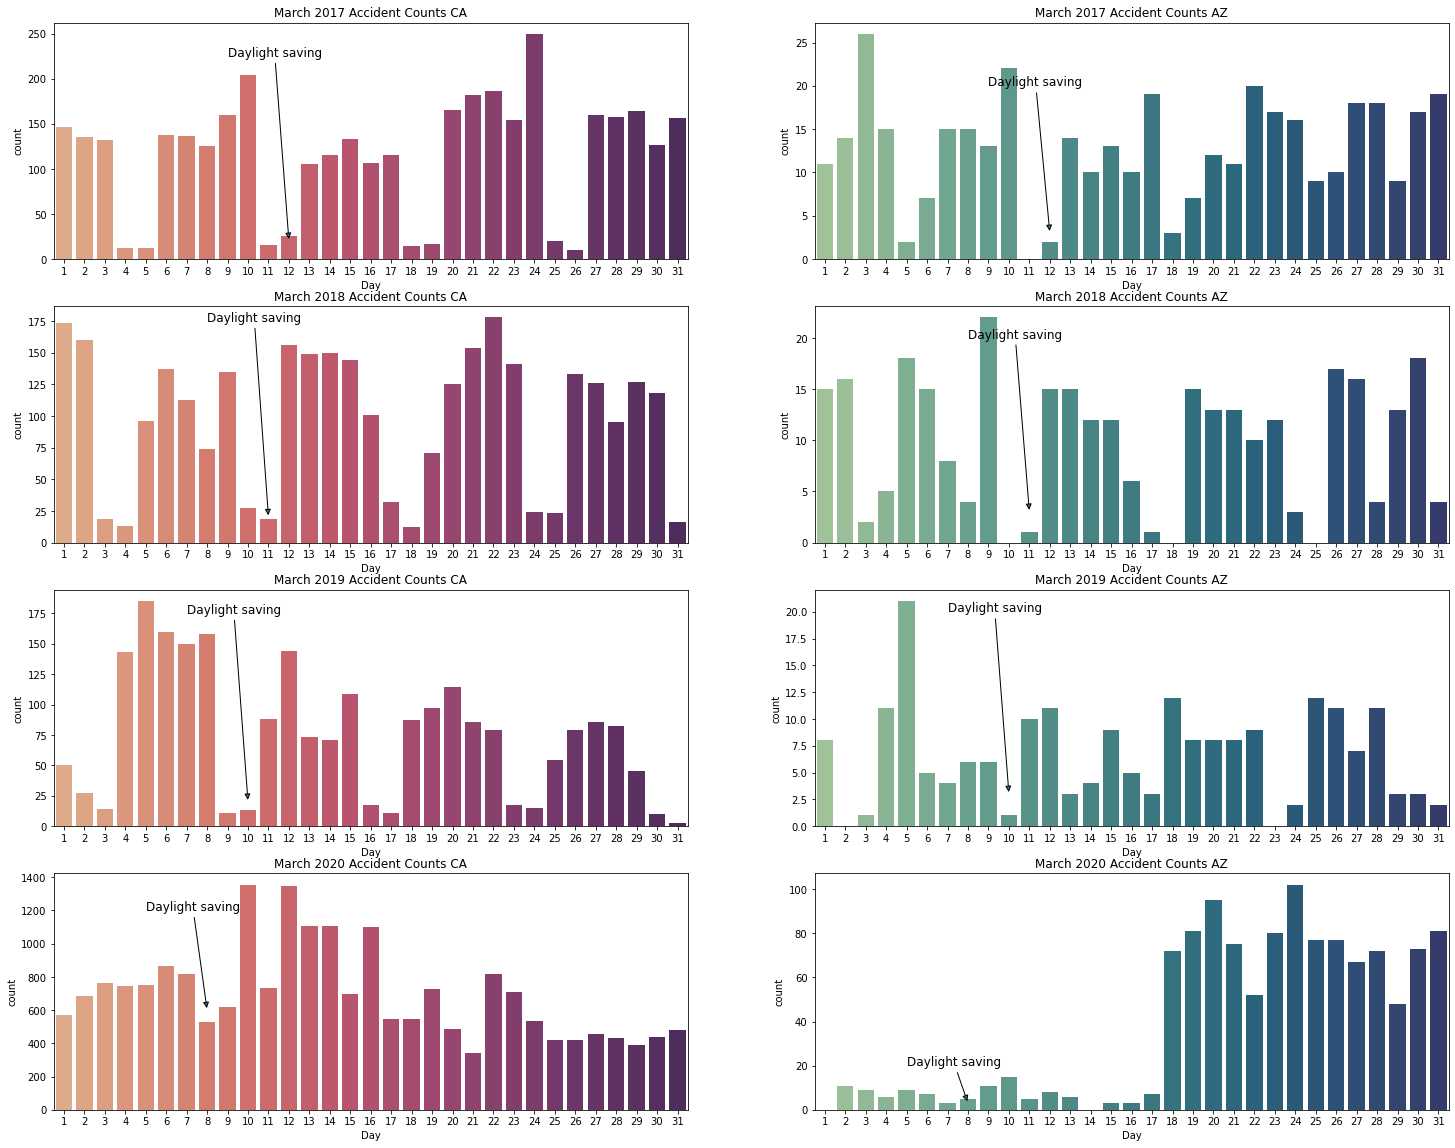

In [9]:
# Plot the figure
fig, axs = plt.subplots(4, 2, figsize = (25,20))

# Plot countplot of accidents count vs day for March 2017~2020 in CA
years = range(2017, 2021)
for N, Y in enumerate(years):
    sns.countplot(ax = axs[N, 0], x=(CAdf[(CAdf['Year'] == Y) & (CAdf['Month'] == 3)])['Day'],
                  order = list(range(CAdf.Day.min(),CAdf.Day.max()+1)), palette = "flare")
    axs[N, 0].set_title("March " + str(Y)+ " Accident Counts CA")
# Marking the day daylight saving occur in CA
axs[0, 0].annotate('Daylight saving',xy=(11,20),xytext=(8,225),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[1, 0].annotate('Daylight saving',xy=(10,20),xytext=(7,175),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[2, 0].annotate('Daylight saving',xy=(9,20),xytext=(6,175),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[3, 0].annotate('Daylight saving',xy=(7,600),xytext=(4,1200),arrowprops={'arrowstyle':'-|>'}, fontsize=12)

# Plot countplot of accidents count vs day for March 2017~2020 in AZ
years = range(2017, 2021)
for N, Y in enumerate(years):
    sns.countplot(ax = axs[N, 1], x=(AZdf[(AZdf['Year'] == Y) & (AZdf['Month'] == 3)])['Day'],
                  order = list(range(AZdf.Day.min(),AZdf.Day.max()+1)), palette = "crest")
    axs[N, 1].set_title("March " + str(Y)+ " Accident Counts AZ")
# Marking the day daylight saving occur in AZ
axs[0, 1].annotate('Daylight saving',xy=(11,3),xytext=(8,20),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[1, 1].annotate('Daylight saving',xy=(10,3),xytext=(7,20),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[2, 1].annotate('Daylight saving',xy=(9,3),xytext=(6,20),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[3, 1].annotate('Daylight saving',xy=(7,3),xytext=(4,20),arrowprops={'arrowstyle':'-|>'}, fontsize=12)

There doesn’t seem to be any critical outliers, only that in California, there are two days in a row in a consistent period where the count of car accidents dip substantially, which can be explained due to the fact they are Saturdays and Sundays and therefore there is much less traffic. In Arizona however, this dip in accident count is not so consistent and varies greater than California while still during the weekend.

## By the Heatmap Analysis

This graph shows the accident data during the time surrounding daylight savings in both California and Arizona, to more easily compare the intensity of accidents by the hour. The y-axis shows the hour of the accident, while the x-axis shows the day, and the color (or the heat) of the coordinate shows the how many accidents occurred during that timeframe.

Text(7.5, -1.5, 'Daylight saving')

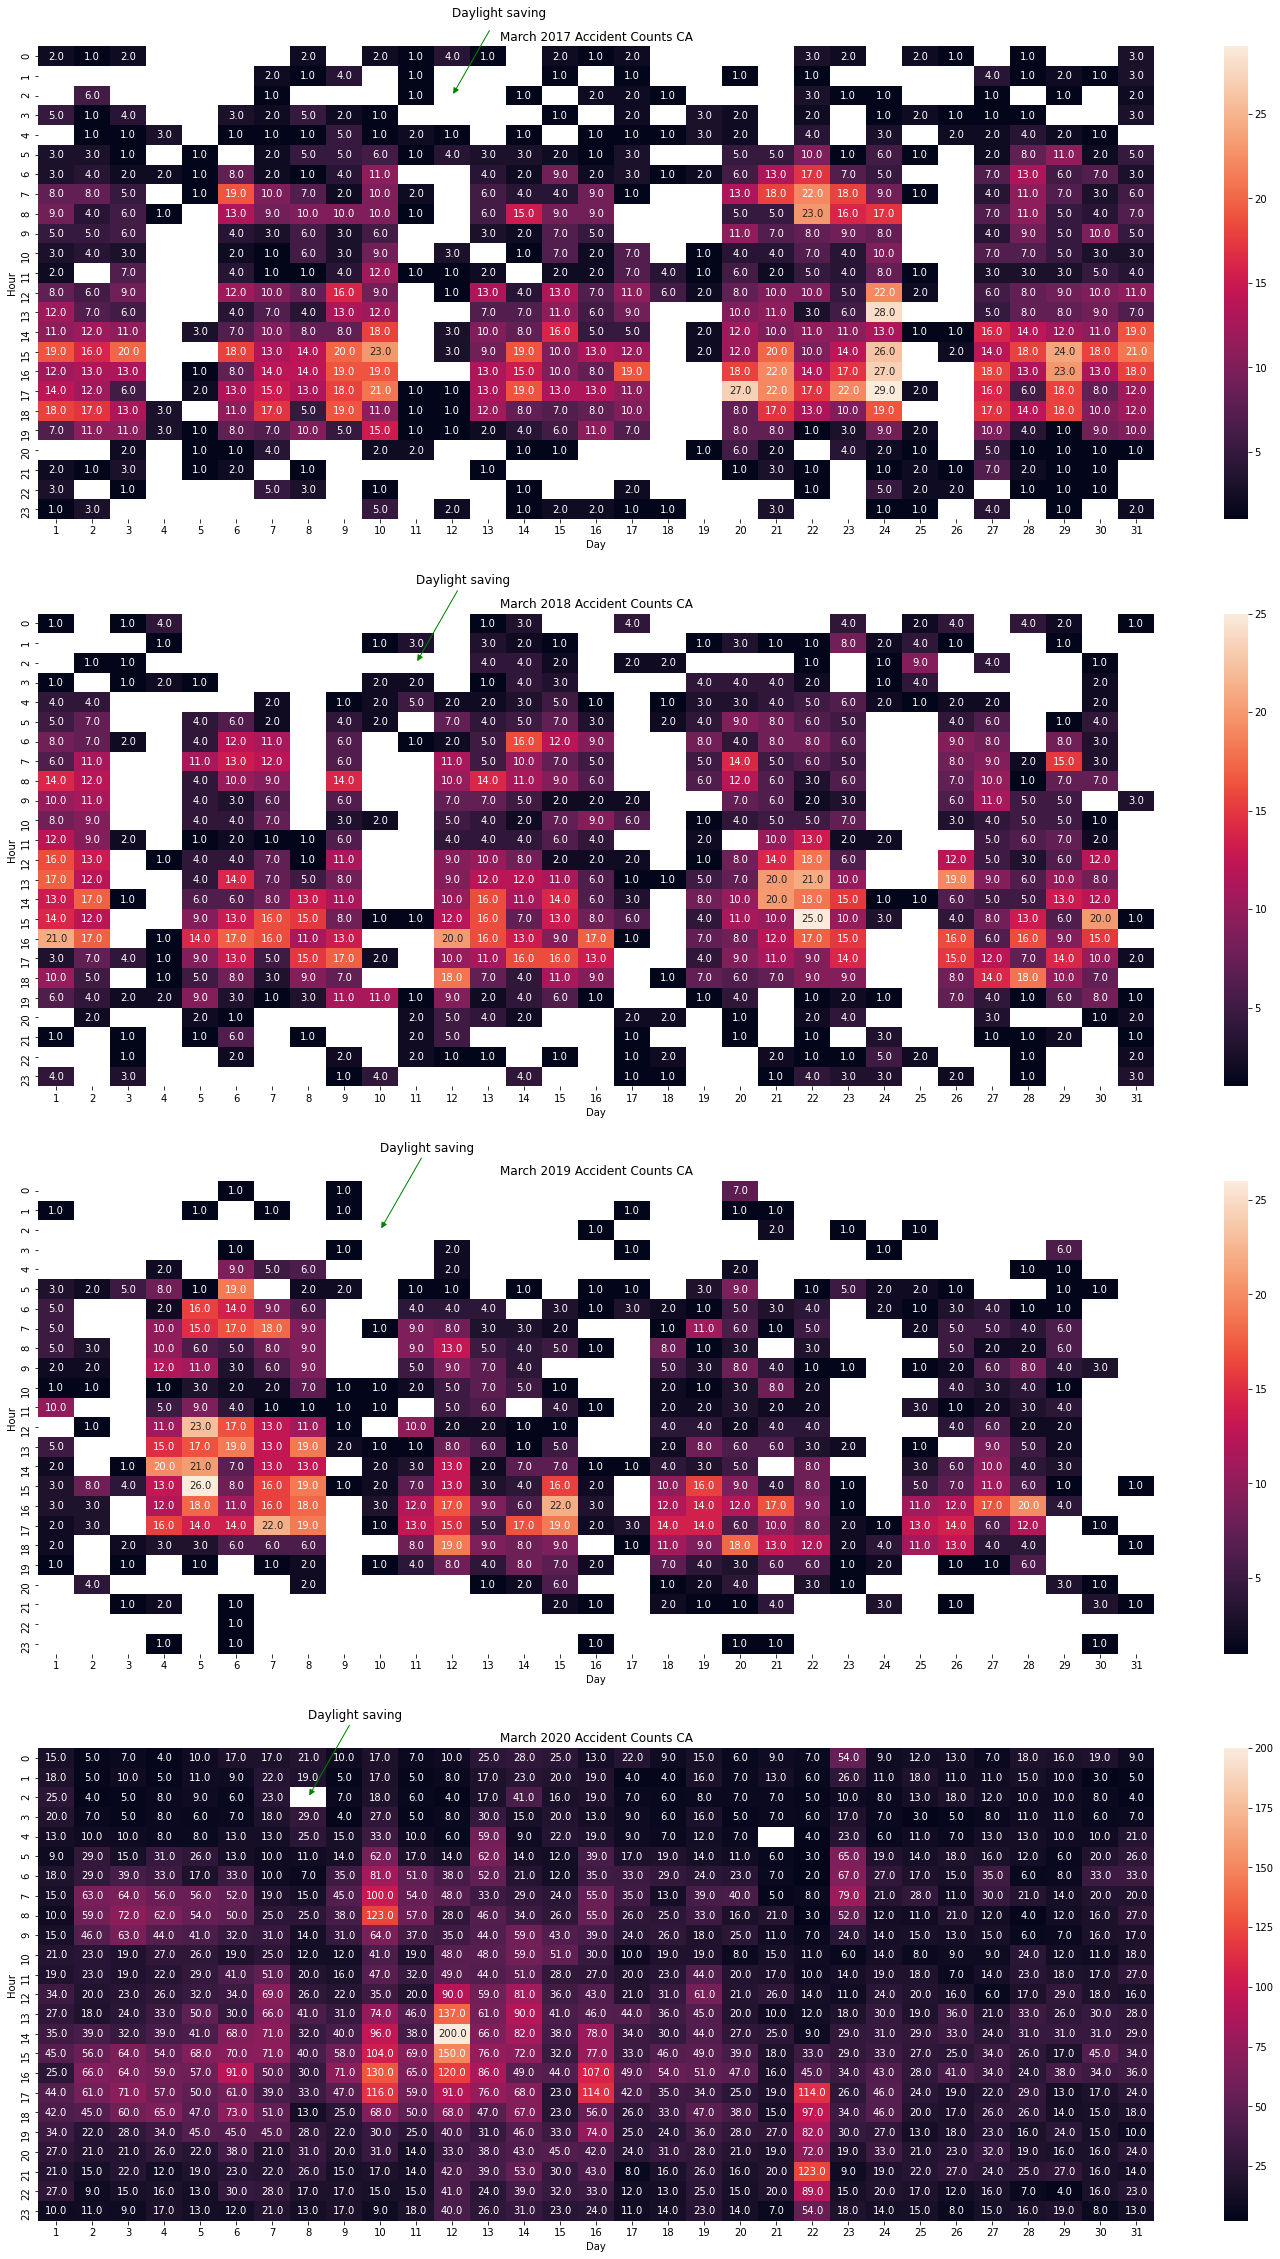

In [10]:
# Create figure
fig, axs = plt.subplots(4, 1, figsize = (25,40))

# Create heatmap from March 2017 to 2020
for N, Y in enumerate(years):
    data = pd.pivot_table((CAdf[(CAdf['Year'] == Y) & (CAdf['Month'] == 3)]), 
                          values='State', index='Hour', columns='Day',
                          aggfunc='count')
    sns.heatmap(data, annot=True, fmt=".1f", ax=axs[N])
    axs[N].set_title("March " + str(Y)+ " Accident Counts CA")

# Marking the day daylight saving occur in CA
axs[0].annotate('Daylight saving',xy=(11.5,2.5),xytext=(11.5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'green', 'shrinkA':10}, fontsize=12)
axs[1].annotate('Daylight saving',xy=(10.5,2.5),xytext=(10.5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'green'}, fontsize=12)
axs[2].annotate('Daylight saving',xy=(9.5,2.5),xytext=(9.5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'green'}, fontsize=12)
axs[3].annotate('Daylight saving',xy=(7.5,2.5),xytext=(7.5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'green'}, fontsize=12)

The distribution the variables tend towards is that accidents tend to occur more in the evening hours of the day on weekdays, and are minimal on the weekends. The greatest outlier in this data would be the year 2020, when significantly more accidents were reported compared to prior years.

## By the Hour Analysis

These plots show how accidents are distributed over the course of the day. Each line represents a unique day with x values representing the hour of day and y values representing the number of accidents that occur. There are generally two peaks in each day, one during morning rush hour and another during evening rush hour. 

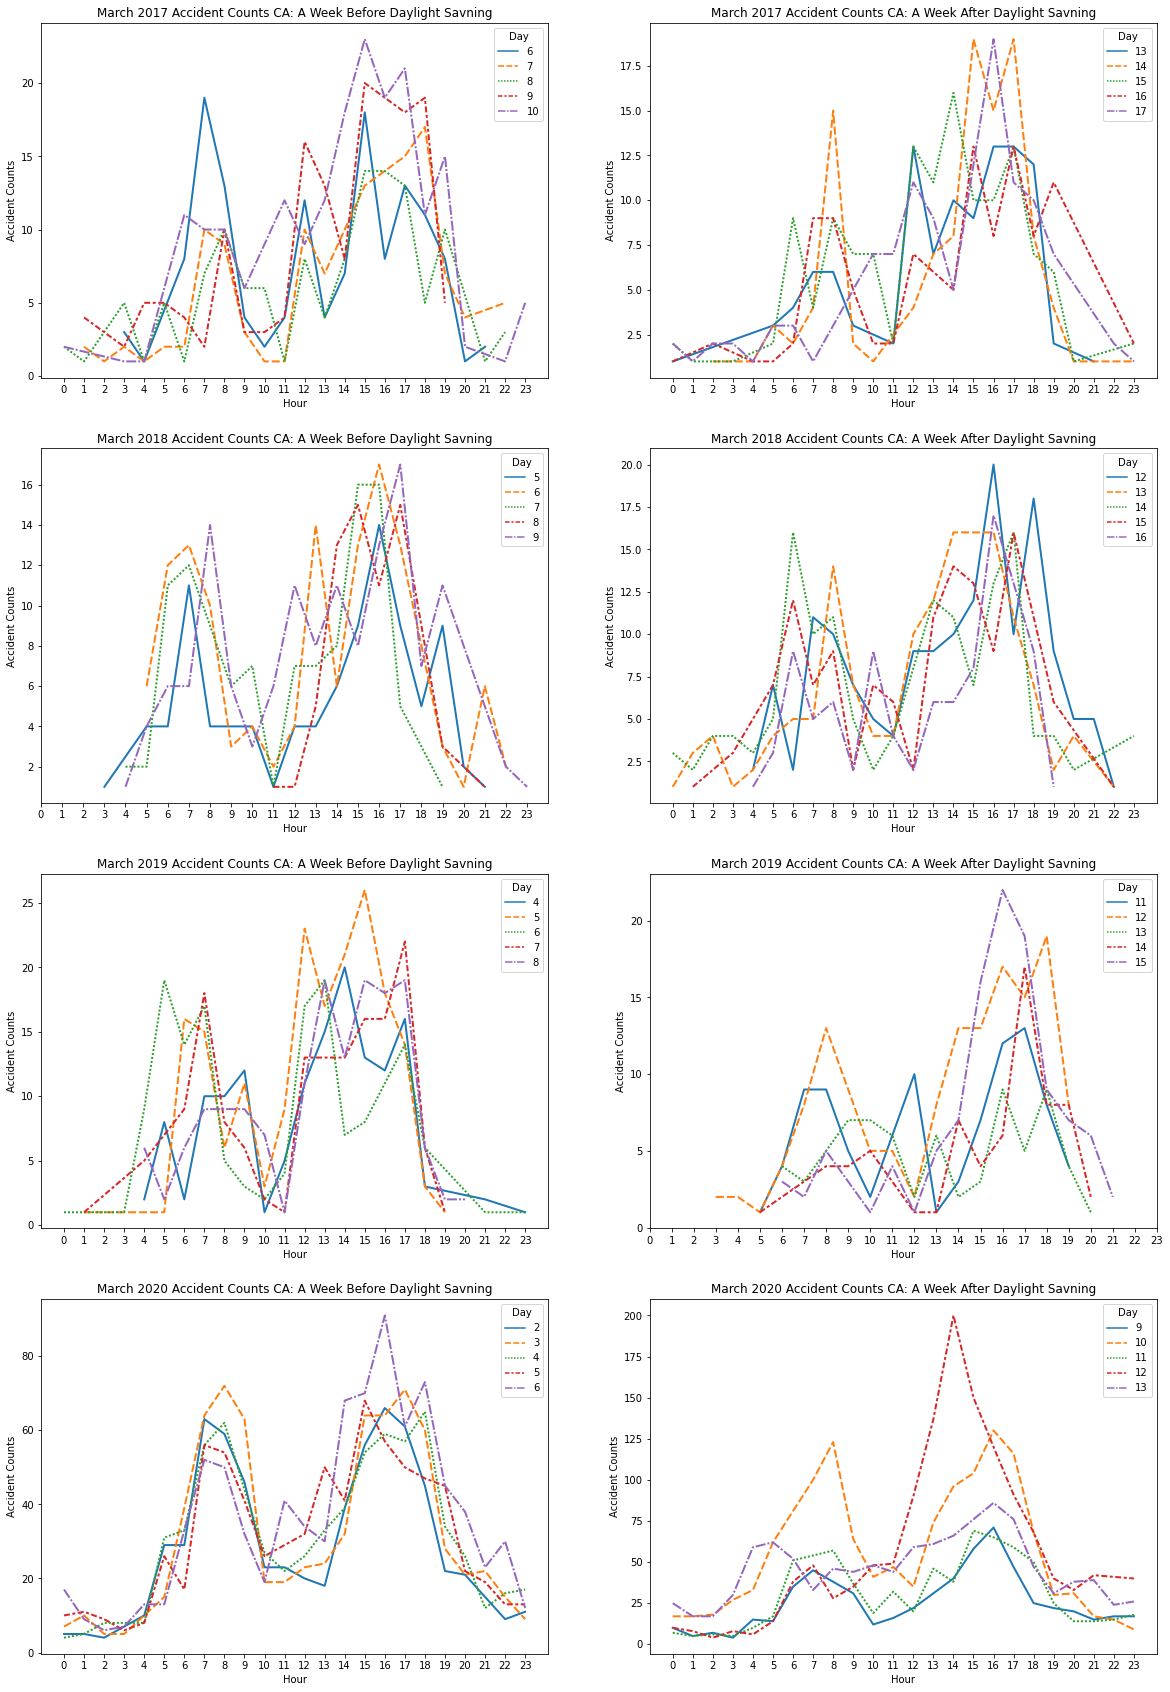

In [11]:
# Create figure
fig, axs = plt.subplots(4, 2, figsize = (20,30))

week = ([[6, 7, 8, 9, 10],[13, 14, 15, 16, 17]],
        [[5, 6, 7, 8, 9],[12, 13, 14, 15, 16]],
        [[4, 5, 6, 7, 8],[11, 12, 13, 14, 15]],
        [[2, 3, 4, 5, 6],[9, 10, 11, 12, 13]])

# Create lineplot for March 2017 to 2020 a week before/after daylight saving
for N, Y in enumerate(years):
    for I in range(0,2):
        data = pd.pivot_table((CAdf[(CAdf['Year'] == Y) & (CAdf['Month'] == 3)]),
                              values='State', index='Hour', columns='Day',
                              aggfunc='count')
        sns.lineplot(data=data[week[N][I]], ax = axs[N][I], linewidth = 2)
        axs[N][I].set_xticks(range(len(list(range(CAdf.Hour.min(),CAdf.Hour.max()+1)))))
        axs[N][I].set_xticklabels(list(range(CAdf.Hour.min(),CAdf.Hour.max()+1)))
        if I == 0:
            axs[N][I].set_title("March " + str(Y)+ " Accident Counts CA: A Week Before Daylight Savning")
        else:
            axs[N][I].set_title("March " + str(Y)+ " Accident Counts CA: A Week After Daylight Savning")
        axs[N][I].set_ylabel('Accident Counts')

The most significant outliers are in the week following daylight savings in March 2020, with a high peak of around 200 accidents at hour 14 of day 12 and around 125 accidents at hour 8 and 16 of day 10. It is difficult to find any other significant outliers.